In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/JRA55/monthly/JRA55_MONTHLY_1980_2015.nc')
 

data

<xarray.Dataset>
Dimensions:  (time: 432, lon: 640, lat: 320)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * lat      (lat) float64 89.57 89.01 88.45 87.89 ... -88.45 -89.01 -89.57
Data variables:
    tpr      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Jun 15 14:15:39 2022: cdo mergetime JRA55_monthly_tpr.n...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [3]:
#if you have more nc files in a folder then use the following command

#data = xr.open_mfdataset('/home/mkibria/Academic/pr_of_thesis/model/JRA55/*.nc')


In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (time: 144, lon: 640, lat: 320)
Coordinates:
  * time     (time) datetime64[ns] 1980-06-01 1980-07-01 ... 2015-09-01
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * lat      (lat) float64 89.57 89.01 88.45 87.89 ... -88.45 -89.01 -89.57
Data variables:
    tpr      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Jun 15 14:15:39 2022: cdo mergetime JRA55_monthly_tpr.n...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [5]:
#data.lon.values
#data.lat.values

In [6]:
#to select the x and y coordinates
#data = data.isel(lon = slice(85,96), lat = slice(18,28))
#data

In [7]:
#getting the mean for JJAS data
jjas_mean = jjas_data.tpr.mean('time')
 
jjas_mean 

<xarray.DataArray 'tpr' (lat: 320, lon: 640)>
array([[1.0523478 , 1.0525717 , 1.0527886 , ..., 1.0518527 , 1.0520223 ,
        1.0522054 ],
       [1.0247735 , 1.0252618 , 1.0255941 , ..., 1.0240546 , 1.0242716 ,
        1.0245904 ],
       [1.0151435 , 1.0155843 , 1.0160048 , ..., 1.0140245 , 1.0145332 ,
        1.0148112 ],
       ...,
       [0.13140191, 0.13123237, 0.13096789, ..., 0.13237847, 0.1321479 ,
        0.13166639],
       [0.14375813, 0.14355469, 0.14299859, ..., 0.145067  , 0.14445665,
        0.14403619],
       [0.14907497, 0.14905463, 0.14885119, ..., 0.1495158 , 0.14933947,
        0.14912245]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * lat      (lat) float64 89.57 89.01 88.45 87.89 ... -88.45 -89.01 -89.57

In [8]:
#changing unit from mm/h to mm/day
pr_mm = jjas_mean
pr_mm

<xarray.DataArray 'tpr' (lat: 320, lon: 640)>
array([[1.0523478 , 1.0525717 , 1.0527886 , ..., 1.0518527 , 1.0520223 ,
        1.0522054 ],
       [1.0247735 , 1.0252618 , 1.0255941 , ..., 1.0240546 , 1.0242716 ,
        1.0245904 ],
       [1.0151435 , 1.0155843 , 1.0160048 , ..., 1.0140245 , 1.0145332 ,
        1.0148112 ],
       ...,
       [0.13140191, 0.13123237, 0.13096789, ..., 0.13237847, 0.1321479 ,
        0.13166639],
       [0.14375813, 0.14355469, 0.14299859, ..., 0.145067  , 0.14445665,
        0.14403619],
       [0.14907497, 0.14905463, 0.14885119, ..., 0.1495158 , 0.14933947,
        0.14912245]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * lat      (lat) float64 89.57 89.01 88.45 87.89 ... -88.45 -89.01 -89.57

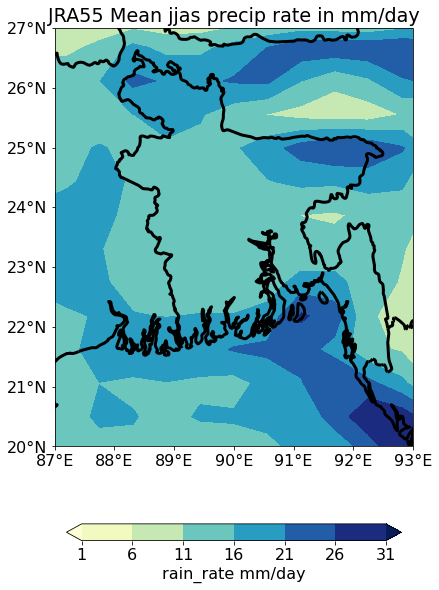

In [14]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')



# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)



plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
plt.title('JRA55 Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_jra55_jjas_mean.png")

In [15]:
annual_mean = data.tpr.mean('time')
annual_mean

<xarray.DataArray 'tpr' (lat: 320, lon: 640)>
array([[0.66326225, 0.6634205 , 0.6635708 , ..., 0.6628825 , 0.6630136 ,
        0.6631515 ],
       [0.6565495 , 0.65687954, 0.65709656, ..., 0.6559934 , 0.6561641 ,
        0.656406  ],
       [0.66429985, 0.66472256, 0.66516   , ..., 0.6631741 , 0.6636398 ,
        0.6639766 ],
       ...,
       [0.12361315, 0.12347751, 0.12328988, ..., 0.12440886, 0.12424836,
        0.12384146],
       [0.13579758, 0.13562351, 0.13521661, ..., 0.13677865, 0.13635594,
        0.13604397],
       [0.14248317, 0.14245832, 0.14230686, ..., 0.14286296, 0.14269568,
        0.14251482]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * lat      (lat) float64 89.57 89.01 88.45 87.89 ... -88.45 -89.01 -89.57

In [16]:
#converting from mm/h to mm/day

annual_pr_mm = annual_mean
annual_pr_mm

<xarray.DataArray 'tpr' (lat: 320, lon: 640)>
array([[0.66326225, 0.6634205 , 0.6635708 , ..., 0.6628825 , 0.6630136 ,
        0.6631515 ],
       [0.6565495 , 0.65687954, 0.65709656, ..., 0.6559934 , 0.6561641 ,
        0.656406  ],
       [0.66429985, 0.66472256, 0.66516   , ..., 0.6631741 , 0.6636398 ,
        0.6639766 ],
       ...,
       [0.12361315, 0.12347751, 0.12328988, ..., 0.12440886, 0.12424836,
        0.12384146],
       [0.13579758, 0.13562351, 0.13521661, ..., 0.13677865, 0.13635594,
        0.13604397],
       [0.14248317, 0.14245832, 0.14230686, ..., 0.14286296, 0.14269568,
        0.14251482]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * lat      (lat) float64 89.57 89.01 88.45 87.89 ... -88.45 -89.01 -89.57

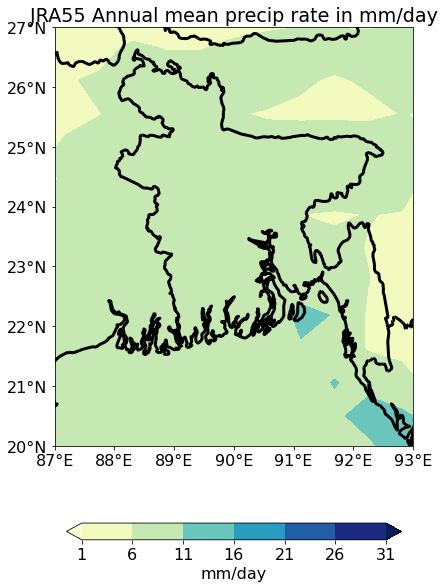

In [17]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'][:], annual_pr_mm['lat'][:],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
#ax.add_feature(cfeature.STATES)
plt.title('JRA55 Annual mean precip rate in mm/day')


plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_jra55_annual_mean.png")